In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import random
import copy
import sys
import networkx as nx
from pyvis.network import Network
import networkx.algorithms.community as nx_comm
# !pip install python-modularity-maximization==0.0.1rc4
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
import community
# !pip install cdlib 

from cdlib import algorithms, viz
from cdlib import evaluation
from cdlib import NodeClustering
from cdlib import NodeClustering

import import_ipynb


Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'karateclub', 'graph_tool', 'leidenalg'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg'}


In [2]:
G = nx.Graph()

F = nx.Graph()
H = nx.Graph()
threshold = 0.25
alpha = .8
simC = 0.6
beta = 0.6

df = pd.read_csv("698_feat_edited", header= None)
#df = df.sample(n=650)     # k rows

# df = pd.DataFrame(pd.np.random.random(650))

df = df.iloc[:, :1433]             # Select first columns
df.dropna(how='all')  

s = df.values.tolist()




#print((s))
nlst = len(s)

print(s[0][0])
key = []
for i in range(len(s)):
    key.append(s[i][0])
    s[i].remove(s[i][0])
# print(key)

810


In [3]:
dfe = pd.read_csv("698_edgeEdited", header= None )#, nrows = 100)
dfe.dropna(how='all')  

print(dfe)
edge = dfe.values.tolist()
print(len(edge))
nlst = len(edge)
print(edge)

       0    1
0    881  858
1    828  697
2    884  864
3    856  869
4    889  856
..   ...  ...
535  774  830
536  800  856
537  858  881
538  823  774
539  830  819

[540 rows x 2 columns]
540
[[881, 858], [828, 697], [884, 864], [856, 869], [889, 856], [872, 873], [719, 713], [861, 863], [840, 803], [864, 856], [719, 840], [745, 805], [865, 857], [874, 873], [708, 823], [872, 885], [870, 871], [888, 889], [825, 889], [869, 774], [729, 888], [769, 869], [823, 840], [861, 729], [774, 769], [805, 800], [713, 819], [774, 856], [885, 859], [729, 876], [872, 887], [895, 881], [697, 890], [823, 810], [870, 895], [871, 879], [823, 753], [819, 719], [708, 869], [719, 810], [745, 830], [747, 830], [774, 810], [856, 747], [879, 881], [776, 874], [774, 805], [747, 819], [772, 828], [888, 804], [890, 753], [889, 886], [856, 864], [864, 893], [747, 719], [861, 889], [819, 708], [769, 811], [867, 874], [887, 874], [868, 857], [828, 810], [878, 889], [889, 753], [719, 772], [819, 823], [867, 877],

In [4]:
E = []
F = []

for i in range(len(edge)):
    #print(edge[i][0])
    E.append(edge[i][0])
    F.append(edge[i][1])
    
# netCora = Network()

# for i,j in zip(E, F):
#     print(f'{i} -- {j}')
#     netCora.add_node(i)
#     netCora.add_node(j)
#     netCora.add_edge(i, j)

for i,j in zip(E, F):
    H.add_node(i)
    H.add_node(j)
    H.add_edge(i, j)
edge_count = 0
net0 = Network()
for i,j in zip(E, F):
    print(f'{i} -- {j}')
    edge_count += 1
    net0.add_node(i)
    net0.add_node(j)
    net0.add_edge(i, j)
net0.get_network_data()
print(edge_count)
# net0.show_buttons(filter_=['physics'])
# net0.show("net0.html")


881 -- 858
828 -- 697
884 -- 864
856 -- 869
889 -- 856
872 -- 873
719 -- 713
861 -- 863
840 -- 803
864 -- 856
719 -- 840
745 -- 805
865 -- 857
874 -- 873
708 -- 823
872 -- 885
870 -- 871
888 -- 889
825 -- 889
869 -- 774
729 -- 888
769 -- 869
823 -- 840
861 -- 729
774 -- 769
805 -- 800
713 -- 819
774 -- 856
885 -- 859
729 -- 876
872 -- 887
895 -- 881
697 -- 890
823 -- 810
870 -- 895
871 -- 879
823 -- 753
819 -- 719
708 -- 869
719 -- 810
745 -- 830
747 -- 830
774 -- 810
856 -- 747
879 -- 881
776 -- 874
774 -- 805
747 -- 819
772 -- 828
888 -- 804
890 -- 753
889 -- 886
856 -- 864
864 -- 893
747 -- 719
861 -- 889
819 -- 708
769 -- 811
867 -- 874
887 -- 874
868 -- 857
828 -- 810
878 -- 889
889 -- 753
719 -- 772
819 -- 823
867 -- 877
819 -- 828
876 -- 889
708 -- 819
828 -- 856
856 -- 708
800 -- 810
708 -- 830
729 -- 882
887 -- 776
867 -- 776
719 -- 774
861 -- 804
856 -- 878
772 -- 713
894 -- 879
810 -- 747
772 -- 805
774 -- 719
753 -- 708
697 -- 830
772 -- 856
885 -- 877
886 -- 889
745 -- 810

In [5]:
#print((set(E)))
sinE = [item for item in key if item not in list(set(E))]
#print(sinE)
sinF = [item for item in key if item not in list(set(F))]
#print(sinF)

single_node = set(sinE).union(set(sinF))
single_node = list(single_node)
#print(single_node)
H.add_nodes_from(single_node)
print(H)


Graph with 66 nodes and 270 edges


In [6]:
Degree = {node:val for (node, val) in H.degree()}
for i in range(len(sinE)):
    Degree[sinE[i]] = 0
Degree = sorted(Degree.items(), key = lambda x:x[1], reverse = True)
Degree = dict(Degree)
#print(Degree)
print(len(Degree))

66


In [7]:
list1 = []
list2 = []
def tanimoto(list1, list2):
    onlyA = sum(i == 1 and j == 0 for i,j in zip(list1, list2))
    onlyB = sum(i == 0 and j == 1 for i,j in zip(list1, list2))
    bothAB = sum(i == j == 1  for i, j in zip(list1, list2))
    if onlyA + onlyB + bothAB == 0:
        tanimoto_similarity = 0
    else:
        tanimoto_similarity = (bothAB/(onlyA + onlyB + bothAB))
    return tanimoto_similarity

In [8]:
print(edge)

[[881, 858], [828, 697], [884, 864], [856, 869], [889, 856], [872, 873], [719, 713], [861, 863], [840, 803], [864, 856], [719, 840], [745, 805], [865, 857], [874, 873], [708, 823], [872, 885], [870, 871], [888, 889], [825, 889], [869, 774], [729, 888], [769, 869], [823, 840], [861, 729], [774, 769], [805, 800], [713, 819], [774, 856], [885, 859], [729, 876], [872, 887], [895, 881], [697, 890], [823, 810], [870, 895], [871, 879], [823, 753], [819, 719], [708, 869], [719, 810], [745, 830], [747, 830], [774, 810], [856, 747], [879, 881], [776, 874], [774, 805], [747, 819], [772, 828], [888, 804], [890, 753], [889, 886], [856, 864], [864, 893], [747, 719], [861, 889], [819, 708], [769, 811], [867, 874], [887, 874], [868, 857], [828, 810], [878, 889], [889, 753], [719, 772], [819, 823], [867, 877], [819, 828], [876, 889], [708, 819], [828, 856], [856, 708], [800, 810], [708, 830], [729, 882], [887, 776], [867, 776], [719, 774], [861, 804], [856, 878], [772, 713], [894, 879], [810, 747], [77

In [9]:

def adjacency_matrix(i, j):
    ed = []
    ed.append(i)
    ed.append(j)
    if ed in edge:
        return 1
    else:
        return 0
    
        
        
# adjacency_matrix(81774, 820661)       

In [10]:
extJac = {}

def extJaccard(graph, node1, node2):
    a = adjacency_matrix(node1, node2)
    len1 = len(set(graph.neighbors(node1)).intersection(graph.neighbors(node2)))
    len2 = len(set(graph.neighbors(node1)).union(graph.neighbors(node2)))
    if len2 >= 1 :
        return round(a*len1/len2, 3)
    else:
        return 0


# print(extJaccard(817774, 820661))

In [11]:
coreD = {}
def coreDominance(graph, node):
    val = 0
    for i in key:
        val += extJaccard(graph, node, i)
    coreD[node] = val



In [12]:
bet_centrality = nx.betweenness_centrality(H, normalized = True, endpoints = False)
close_centrality = nx.closeness_centrality(H)
deg_centrality = nx.degree_centrality(H)

centrality = {}
for node in key:
    b = bet_centrality.get(node)
    c = close_centrality.get(node)
    d = deg_centrality.get(node)
    
    x = (b+ c+ d)/3
    centrality[node] = x

In [13]:
lst = {}
for i in range(len(key)):
    lst[key[i]]=s[i]


In [14]:
for i in key:
    print(f'Neighbour of node {i} is: {set(H.neighbors(i))}')


Neighbour of node 810 is: {800, 805, 774, 745, 713, 747, 719, 823, 856, 828}
Neighbour of node 857 is: {865, 868, 862, 871}
Neighbour of node 811 is: {800, 769, 708, 869, 774, 856, 890}
Neighbour of node 858 is: {881, 871, 870, 895}
Neighbour of node 859 is: {885}
Neighbour of node 860 is: set()
Neighbour of node 769 is: {800, 708, 869, 774, 811, 747, 753, 856, 697, 890, 828, 798}
Neighbour of node 861 is: {804, 876, 878, 753, 856, 888, 729, 889, 863}
Neighbour of node 840 is: {803, 708, 805, 774, 713, 747, 719, 819, 823, 856, 697, 828, 830}
Neighbour of node 862 is: {857, 865, 868}
Neighbour of node 863 is: {804, 876, 878, 882, 888, 886, 856, 729, 861, 889}
Neighbour of node 729 is: {804, 876, 878, 753, 882, 856, 886, 888, 889, 861, 863}
Neighbour of node 864 is: {856, 825, 884, 893}
Neighbour of node 865 is: {857, 868, 862}
Neighbour of node 866 is: {881, 895, 894, 879}
Neighbour of node 867 is: {776, 872, 874, 873, 877, 885, 887}
Neighbour of node 697 is: {800, 769, 772, 708, 805, 8

In [15]:
s_not = copy.deepcopy(key)

s_done = []
current = []

# compare = 0
# count = 0
# count_while = 0
# com = 0

connect = set()

arrTS = {}
m = len(s_not)
ats = []

community = {}

for i in range( len(s_not)):
    print(i)
#     print(s[i])
print((s_not))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
[810, 857, 811, 858, 859, 860, 769, 861, 840, 862, 863, 729, 864, 865, 866, 867, 697, 868, 869, 708, 776, 870, 819, 871, 872, 703, 873, 800, 874, 828, 875, 830, 876, 713, 745, 747, 877, 878, 879, 880, 881, 882, 883, 884, 798, 885, 753, 823, 886, 887, 888, 772, 719, 889, 890, 774, 825, 891, 892, 803, 893, 804, 894, 805, 895, 856]


In [16]:
def get_second_neighbors(graph, node) -> list:
    """
    Returns a list of unique second neighbors for a given node in the graph.
    """
    return ([second_neighbor 
            for first_neighbor in graph.neighbors(node)
            for second_neighbor in graph.neighbors(first_neighbor) 
            if second_neighbor != node])


In [17]:
# def get_num_shared_neighbors(graph, node1, node2) -> int:
#     """
#     Returns a number of second neighbors shared by node1 and node2 in the graph.
#     """
#     return len(set.intersection(set(get_second_neighbors(graph, node1)), 
#                                 set(get_second_neighbors(graph, node2))))

In [18]:
def sec_order_sim(graph, node1, node2):
    a = adjacency_matrix(node1, node2)
    len1 = len(set.intersection(set(get_second_neighbors(graph, node1)), 
                                set(get_second_neighbors(graph, node2))))
    len2 = len(set.union(set(get_second_neighbors(graph, node1)), 
                                set(get_second_neighbors(graph, node2))))
    
    if len2 >= 1:
        return a*len1/len2
    else:
        return 0
    
    
    
        
 


# len1 = len(set(H.neighbors(node1)).intersection(H.neighbors(node2)))
# len2 = len(set(H.neighbors(node1)).union(H.neighbors(node2)))

In [19]:
coreD.clear()
for i in key:
    coreDominance(H, i)


In [20]:
coreD = sorted(coreD.items(), key = lambda x:x[1], reverse = True)
coreD = dict(coreD)

In [21]:
coreD
#print(max(coreD, key=coreD.get))

{828: 10.382,
 823: 9.973999999999998,
 747: 9.761999999999999,
 719: 9.154,
 713: 8.9,
 805: 8.583,
 774: 8.456,
 830: 8.396,
 697: 8.175,
 800: 8.148,
 708: 7.885999999999999,
 819: 7.616999999999998,
 856: 6.97,
 729: 6.326,
 863: 6.303999999999999,
 876: 6.303999999999999,
 840: 6.288,
 889: 6.0280000000000005,
 804: 5.945,
 745: 5.921,
 878: 5.42,
 861: 4.765000000000001,
 888: 4.609,
 810: 4.4830000000000005,
 867: 3.917,
 776: 3.917,
 769: 3.795000000000001,
 872: 3.662,
 874: 3.662,
 886: 3.563,
 885: 3.556,
 882: 3.269,
 703: 2.6910000000000003,
 881: 2.625,
 753: 2.609,
 873: 2.586,
 887: 2.586,
 811: 2.355,
 870: 2.3040000000000003,
 871: 2.026,
 869: 1.961,
 895: 1.946,
 880: 1.9440000000000002,
 772: 1.927,
 858: 1.787,
 890: 1.6600000000000001,
 879: 1.591,
 862: 1.4,
 865: 1.4,
 868: 1.4,
 857: 1.2000000000000002,
 864: 1.198,
 866: 0.8280000000000001,
 884: 0.7670000000000001,
 877: 0.722,
 893: 0.6320000000000001,
 825: 0.6319999999999999,
 894: 0.625,
 803: 0.269,
 85

In [22]:
def chooseNode(s_not):
    node = max(coreD, key=coreD.get)
    del coreD[node]
    return node

# def chooseNode(s_not):
#     node = max(centrality, key=centrality.get)
#     del centrality[node]
#     return node


In [23]:
G.add_nodes_from(key)

def get_key_lst(val):
    for key, value in lst.items():
        if val == value:
            return key

In [24]:
def struct_similarity(graph, n1, n2):
    ssim = beta * extJaccard(graph, n1, n2) + (1 - beta) * sec_order_sim(graph, n1, n2)
    return(round(ssim, 2))

In [25]:
def similarity(graph, n1, n2):
    sim = simC * struct_similarity(graph, n1, n2) + (1 - simC) * tanimoto(lst[n1], lst[n2])
    sim = round(sim, 2)
    return sim

In [26]:
net = Network()
net.add_nodes(key)

-------------------  New big while starts   ---------------------
>>> n value for community 1 is 828
>>> Length of s_not before starting small while is: 65
>>> Length of S_not is in small while loop 0 : 65
>>> Length of S_done is in small while loop 0 : 1
>>> Length of current is in small while loop 0 : 1
1. Tanimoto similarity between node 828 & node 810 is 0.43
2. Tanimoto similarity between node 828 & node 857 is 0.03
3. Tanimoto similarity between node 828 & node 811 is 0.11
4. Tanimoto similarity between node 828 & node 858 is 0.03
5. Tanimoto similarity between node 828 & node 859 is 0.05
6. Tanimoto similarity between node 828 & node 860 is 0.07
7. Tanimoto similarity between node 828 & node 769 is 0.39
8. Tanimoto similarity between node 828 & node 861 is 0.06
9. Tanimoto similarity between node 828 & node 840 is 0.41
10. Tanimoto similarity between node 828 & node 862 is 0.11
11. Tanimoto similarity between node 828 & node 863 is 0.08
12. Tanimoto similarity between node 828 &

231. Tanimoto similarity between node 872 & node 857 is 0.0
232. Tanimoto similarity between node 872 & node 858 is 0.0
233. Tanimoto similarity between node 872 & node 860 is 0.0
234. Tanimoto similarity between node 872 & node 862 is 0.0
235. Tanimoto similarity between node 872 & node 864 is 0.0
236. Tanimoto similarity between node 872 & node 865 is 0.0
237. Tanimoto similarity between node 872 & node 866 is 0.0
238. Tanimoto similarity between node 872 & node 868 is 0.0
239. Tanimoto similarity between node 872 & node 869 is 0.0
240. Tanimoto similarity between node 872 & node 870 is 0.0
241. Tanimoto similarity between node 872 & node 871 is 0.05
242. Tanimoto similarity between node 872 & node 875 is 0.0
243. Tanimoto similarity between node 872 & node 877 is 0.0
244. Tanimoto similarity between node 872 & node 879 is 0.0
245. Tanimoto similarity between node 872 & node 881 is 0.0
246. Tanimoto similarity between node 872 & node 883 is 0.0
247. Tanimoto similarity between node 8

indices : [866, 894, 894, 858, 864, 883]
current : [879, 866, 894, 894, 858, 864, 883]
s_done : [719, 879, 866, 894]
>>> count just increased. count = 3
>>> Now comparing node is 894
shit
>>> while loop no. 4 finished...........................
>>> Length of s_not after starting small while is: 20
>>> Length of S_not is in small while loop 4 : 20
>>> Length of S_done is in small while loop 4 : 5
>>> Length of current is in small while loop 4 : 7
87. Tanimoto similarity between node 894 & node 857 is 0.27
88. Tanimoto similarity between node 894 & node 858 is 0.4
89. Tanimoto similarity between node 894 & node 860 is 0.11
90. Tanimoto similarity between node 894 & node 862 is 0.08
91. Tanimoto similarity between node 894 & node 864 is 0.4
92. Tanimoto similarity between node 894 & node 865 is 0.16
93. Tanimoto similarity between node 894 & node 868 is 0.16
94. Tanimoto similarity between node 894 & node 869 is 0.27
95. Tanimoto similarity between node 894 & node 870 is 0.3
96. Tanimoto 

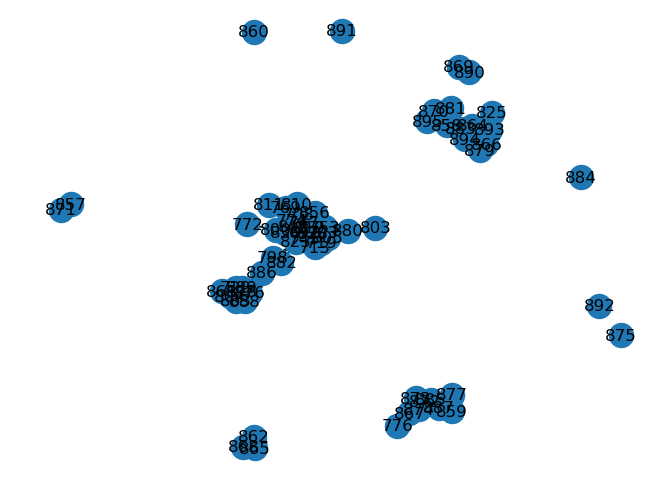

In [27]:
compare = 0
count = 0
count_while = 0
com = 0
indices = []
while(len(s_not) > 0):
    print("-------------------  New big while starts   ---------------------")
    count = 0
    count_while = 0
    com += 1
    
    n = chooseNode(s_not)
    s_done.append(n)
    current.append(n)
    compare = 0
    connect.add(n)
    try:
        s_not.remove(n)
    except:
        print()
    count_com = 0
    print(f'>>> n value for community {com} is {(n)}')
    print(f'>>> Length of s_not before starting small while is: {len(s_not)}')
    
    while(compare < len(s_not)*(len(s_not)-1)/2):
        print(f'>>> Length of S_not is in small while loop {count_while} : {len(s_not)}')
        print(f'>>> Length of S_done is in small while loop {count_while} : {len(s_done)}')
        print(f'>>> Length of current is in small while loop {count_while} : {len(current)}')


        count_while += 1
        
        for i in range(len(s_not)):
            compare += 1
            a = s_not[i]
            b = current[count]
            ts = similarity(H, a, b)   # CHECK S[a] OR LAST[a]
            print(f'{compare}. Tanimoto similarity between node {(current[count])} & node {(s_not[i])} is {ts}')
            
            if ts >= threshold:
                arrTS.update({(s_not[i]) : ts})
            else:
                arrTS.update({(s_not[i]) : 0})
            
        maxind = max(arrTS, key=arrTS.get)
        maxi = arrTS[maxind]
        print(f'maxind : {maxind}, maxi:  {maxi}')
            
        if maxi == 0:
            if len(current) == 1:
                n = random.choice(s_not)
                print(f'>>> n value is changed to {(n)}')
                ats.append(current[count])
                current.clear()
                current.append(n)
                s_done.append(n)
                try:
                    s_not.remove(n)
                except:
                    print()
                
            elif len(current) > 1:
                print(f's_done is now : {s_done}')
                print(f'Current is now : {current}')

                mitter = [ele for ele in current if ele not in list(set(current).intersection(s_done))]
                print(f'mitter is : {mitter}') 

                if len(mitter) == 0:
                    print("<<< This is the end >>>")
                    break
                        
                n = random.choice(mitter)  #check n = mitter[0] ??
                print(f'>>> n value is changed to (taken from mitter) {(n)}')

                current[count] = n
                mitter.remove(n)

                #current.append(lst[n])
                #current_index.append(n)

                s_done.append(n)

                try:
                    s_not.remove(n)
                except:
                    print("list.remove(x): x not in list s_not")
                    
        else:
            
            for i in list(arrTS.keys()):
                if arrTS[i] >= alpha *  maxi:   # check 0.8 * maxi
                    indices.append(i)
                    
                    G.add_edge((current[count]), i)
                    net.add_edge(current[count], i)
                    
                    #print(f'Node {(current[count])} connected to node {i}')
                    connect.add(i)
                    current.append(i) #.......................................................
                    
                    
            print(f'indices : {indices}')
            print(f'current : {current}')
            print(f's_done : {s_done}')

            count += 1
            print(f'>>> count just increased. count = {count}')
            print(f'>>> Now comparing node is {current[count]}')
            

            s_done.append(current[count])
                
            if current[count] in s_not:
                s_not.remove(current[count])
            else:
                print('shit')
            
        arrTS.clear()
        print(f'>>> while loop no. {count_while} finished...........................')
        print(f'>>> Length of s_not after starting small while is: {len(s_not)}')
    
    
    #print(G.edges)
    
    community[com] = list(connect)
    print(f'community: {community[com]}')
    
    for i in community[com]:
        try:
            s_not.remove(i)
        except:
            print()
    
    s_done.clear()
    current.clear()
    connect.clear()
    indices.clear()
print(G.edges)

print(community)

G.remove_edges_from(nx.selfloop_edges(G))            
nx.draw(G, with_labels = True)  



In [28]:
print(ats)
print(len(ats))
print(type(indices))

[747, 719, 713, 860, 805, 774, 830, 697, 800]
9
<class 'list'>


In [29]:
for i in community.copy():
    if len(community[i]) == 1:
        a = community[i]
        b = a.pop()
        print(b)
        ats.append(b)
        del community[i]
community

830
697
800
708
819
856
729
863
876
840
889
804
745
878
861
888
810
867
776
769
872
874
886
885
882
703
881
753
873
887
811
870
871
869
895
880
772
858
890
879
862
865
868
857
864
866
884
877
893
825
894
803
859
860
875


{1: [769,
  772,
  774,
  800,
  803,
  805,
  810,
  811,
  819,
  823,
  697,
  828,
  830,
  703,
  708,
  840,
  713,
  719,
  856,
  745,
  747,
  880,
  753],
 2: [804, 876, 878, 882, 889, 886, 823, 888, 729, 861, 798, 863],
 3: [867, 872, 873, 874, 747, 877, 885, 887, 859],
 4: [864, 866, 870, 719, 881, 883, 825, 858, 893, 894, 895],
 5: [713, 868, 865],
 6: [890, 805],
 7: [857, 774]}

In [30]:
atsG = nx.Graph()
for i in ats:
    for j in ats:
        if i != j:
            if similarity(H, i, j)>= threshold:
                print(f'[{i}, {j}]')
                atsG.add_node(i)
                atsG.add_node(j)
                atsG.add_edge(i, j)
                
                
                G.add_node(i)
                G.add_node(j)
                G.add_edge(i, j)
                

                
community_ats = {}
from community import best_partition, community_louvain, modularity
communitiesATS =community_louvain.best_partition(atsG)
unique_comsATS = np.unique(list(communitiesATS.values()))
pos = nx.spring_layout(E)
#nx.draw(E, pos, node_size = 75, alpha = 1.0)
# nx.draw(E, with_labels = True)
plt.show()
print(communitiesATS)
for k,v in communitiesATS.items():
    community_ats.setdefault(v, []).append(k)
    
community_ats = sorted(community_ats.items(), key = lambda x:x[0])
community_ats = dict(community_ats)
print(community_ats)

[747, 719]
[747, 713]
[747, 805]
[747, 774]
[747, 830]
[747, 697]
[747, 800]
[747, 830]
[747, 697]
[747, 800]
[747, 708]
[747, 819]
[747, 856]
[747, 840]
[747, 804]
[747, 745]
[747, 810]
[747, 769]
[747, 703]
[747, 753]
[719, 747]
[719, 713]
[719, 805]
[719, 774]
[719, 830]
[719, 697]
[719, 800]
[719, 830]
[719, 697]
[719, 800]
[719, 708]
[719, 819]
[719, 840]
[719, 745]
[719, 810]
[719, 703]
[719, 772]
[713, 747]
[713, 719]
[713, 805]
[713, 774]
[713, 830]
[713, 697]
[713, 800]
[713, 830]
[713, 697]
[713, 800]
[713, 708]
[713, 819]
[713, 840]
[713, 745]
[713, 810]
[713, 772]
[805, 747]
[805, 719]
[805, 713]
[805, 774]
[805, 830]
[805, 697]
[805, 800]
[805, 830]
[805, 697]
[805, 800]
[805, 819]
[805, 840]
[805, 745]
[805, 810]
[805, 703]
[805, 753]
[805, 880]
[805, 772]
[774, 747]
[774, 719]
[774, 713]
[774, 805]
[774, 830]
[774, 800]
[774, 830]
[774, 800]
[774, 708]
[774, 819]
[774, 856]
[774, 840]
[774, 745]
[774, 810]
[774, 769]
[774, 811]
[774, 869]
[830, 747]
[830, 719]
[830, 713]

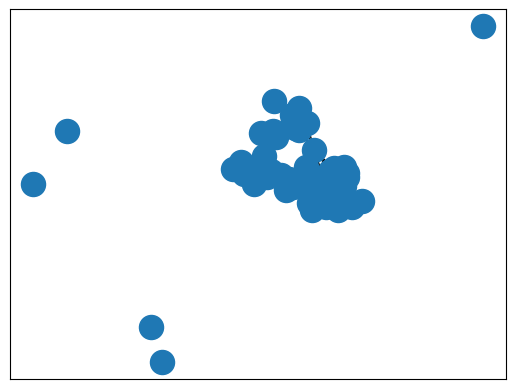

In [31]:
# atsG.remove_edges_from(nx.selfloop_edges(atsG))            
# nx.draw_kamada_kawai(atsG,  with_labels = True)
G.remove_edges_from(nx.selfloop_edges(G))  

nx.draw_networkx(G ,  with_labels = False )

In [32]:
print(community)

{1: [769, 772, 774, 800, 803, 805, 810, 811, 819, 823, 697, 828, 830, 703, 708, 840, 713, 719, 856, 745, 747, 880, 753], 2: [804, 876, 878, 882, 889, 886, 823, 888, 729, 861, 798, 863], 3: [867, 872, 873, 874, 747, 877, 885, 887, 859], 4: [864, 866, 870, 719, 881, 883, 825, 858, 893, 894, 895], 5: [713, 868, 865], 6: [890, 805], 7: [857, 774]}


In [33]:
print(community_ats)

{0: [747, 719, 713, 805, 774, 830, 697, 800, 708, 819, 840, 745, 769, 703, 753, 772, 880, 811, 890, 803], 1: [887, 867, 776, 872, 874, 885, 873, 877, 859], 2: [856, 804, 886, 882, 729, 889, 878, 863, 876, 861, 888, 825], 3: [810, 869, 864, 893, 858, 879, 866, 894, 881, 870, 871, 895, 857, 862, 865, 868]}


In [34]:
community_new = {}
l1 = len(community)
l2 = len(community_ats)
# newlen = len(community) + len(community_ats)
for i in range(l1):
    community_new[i] = list(community.values())[i]

for j in range(l2):
    community_new[l1 + j] = list(community_ats.values())[j]

In [35]:
print(l1)
print(l2)

7
4


In [36]:
print(community_new)

{0: [769, 772, 774, 800, 803, 805, 810, 811, 819, 823, 697, 828, 830, 703, 708, 840, 713, 719, 856, 745, 747, 880, 753], 1: [804, 876, 878, 882, 889, 886, 823, 888, 729, 861, 798, 863], 2: [867, 872, 873, 874, 747, 877, 885, 887, 859], 3: [864, 866, 870, 719, 881, 883, 825, 858, 893, 894, 895], 4: [713, 868, 865], 5: [890, 805], 6: [857, 774], 7: [747, 719, 713, 805, 774, 830, 697, 800, 708, 819, 840, 745, 769, 703, 753, 772, 880, 811, 890, 803], 8: [887, 867, 776, 872, 874, 885, 873, 877, 859], 9: [856, 804, 886, 882, 729, 889, 878, 863, 876, 861, 888, 825], 10: [810, 869, 864, 893, 858, 879, 866, 894, 881, 870, 871, 895, 857, 862, 865, 868]}


In [37]:
for i in community_new:
    print(community_new[i])

[769, 772, 774, 800, 803, 805, 810, 811, 819, 823, 697, 828, 830, 703, 708, 840, 713, 719, 856, 745, 747, 880, 753]
[804, 876, 878, 882, 889, 886, 823, 888, 729, 861, 798, 863]
[867, 872, 873, 874, 747, 877, 885, 887, 859]
[864, 866, 870, 719, 881, 883, 825, 858, 893, 894, 895]
[713, 868, 865]
[890, 805]
[857, 774]
[747, 719, 713, 805, 774, 830, 697, 800, 708, 819, 840, 745, 769, 703, 753, 772, 880, 811, 890, 803]
[887, 867, 776, 872, 874, 885, 873, 877, 859]
[856, 804, 886, 882, 729, 889, 878, 863, 876, 861, 888, 825]
[810, 869, 864, 893, 858, 879, 866, 894, 881, 870, 871, 895, 857, 862, 865, 868]


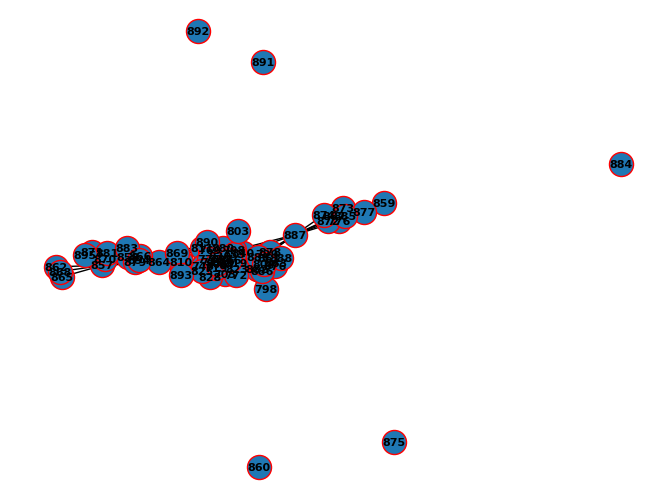

In [38]:
import matplotlib

G.remove_edges_from(nx.selfloop_edges(G))            
#nx.draw(G, with_labels = True)
cmap = matplotlib.colors.ListedColormap(['darkorange', 'lightgray', 'dodgerblue'])
nx.draw(G, with_labels=True,  cmap=cmap, 
         font_size=8, font_weight="bold", width=1.0, 
        edgecolors='red')
plt.show()

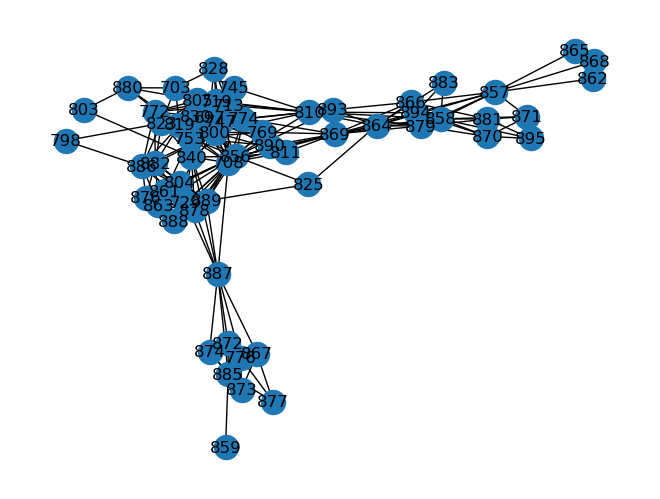

{810: 0, 774: 1, 747: 1, 719: 1, 713: 1, 805: 1, 800: 1, 856: 2, 745: 1, 858: 0, 879: 0, 864: 0, 866: 0, 894: 0, 857: 0, 871: 0, 862: 0, 865: 0, 868: 0, 811: 1, 708: 1, 769: 1, 869: 0, 890: 1, 870: 0, 881: 0, 883: 0, 895: 0, 859: 3, 885: 3, 697: 1, 753: 1, 861: 2, 889: 2, 729: 2, 878: 2, 863: 2, 876: 2, 804: 2, 888: 2, 840: 1, 830: 1, 823: 1, 819: 1, 887: 3, 803: 1, 886: 2, 882: 2, 825: 2, 893: 0, 867: 3, 776: 3, 874: 3, 872: 3, 873: 3, 877: 3, 828: 1, 772: 1, 703: 1, 880: 1, 798: 2}
{0: [810, 858, 879, 864, 866, 894, 857, 871, 862, 865, 868, 869, 870, 881, 883, 895, 893], 1: [774, 747, 719, 713, 805, 800, 745, 811, 708, 769, 890, 697, 753, 840, 830, 823, 819, 803, 828, 772, 703, 880], 2: [856, 861, 889, 729, 878, 863, 876, 804, 888, 886, 882, 825, 798], 3: [859, 885, 887, 867, 776, 874, 872, 873, 877]}


In [39]:
x = G.edges()
E = nx.Graph()
E.add_edges_from(x)

#nx.draw(E, with_labels = True)  

from community import community_louvain
communitiesL =community_louvain.best_partition(E)
unique_comsL = np.unique(list(communitiesL.values()))
pos = nx.spring_layout(E)
#nx.draw(E, pos, node_size = 75, alpha = 1.0)
nx.draw(E, with_labels = True)
plt.show()
print(communitiesL)

# net2 = Network(notebook=True)
# net2.from_nx(E) 
# net.show_buttons(filter_=['physics'])

# net.show("net2.html")

# communitiesL = {y: x for x, y in communitiesL.items()}
diction = {}
from itertools import count

for k,v in communitiesL.items():
    diction.setdefault(v, []).append(k)
print(diction)

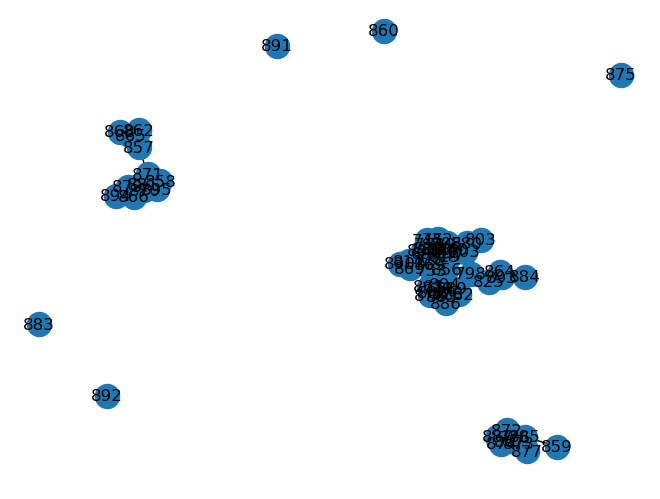

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [40]:
communitiesH =community_louvain.best_partition(H)
unique_comsH = np.unique(list(communitiesH.values()))
pos = nx.spring_layout(E)
#nx.draw(E, pos, node_size = 75, alpha = 1.0)
nx.draw(H, with_labels = True)
plt.show()

net2 = Network(notebook=True)
net2.from_nx(E) 
net.show_buttons(filter_=['physics'])

net.show("net2.html")


In [41]:
cmt = []
for i in range(len(community_new)):
    for j in range(len(community_new[i])):
        cmt.append(community_new[i][j])
print(cmt)
print(len(cmt))
cmt = set(cmt)
print(cmt)
print(len(cmt))

[769, 772, 774, 800, 803, 805, 810, 811, 819, 823, 697, 828, 830, 703, 708, 840, 713, 719, 856, 745, 747, 880, 753, 804, 876, 878, 882, 889, 886, 823, 888, 729, 861, 798, 863, 867, 872, 873, 874, 747, 877, 885, 887, 859, 864, 866, 870, 719, 881, 883, 825, 858, 893, 894, 895, 713, 868, 865, 890, 805, 857, 774, 747, 719, 713, 805, 774, 830, 697, 800, 708, 819, 840, 745, 769, 703, 753, 772, 880, 811, 890, 803, 887, 867, 776, 872, 874, 885, 873, 877, 859, 856, 804, 886, 882, 729, 889, 878, 863, 876, 861, 888, 825, 810, 869, 864, 893, 858, 879, 866, 894, 881, 870, 871, 895, 857, 862, 865, 868]
119
{769, 772, 774, 776, 798, 800, 803, 804, 805, 810, 811, 819, 823, 697, 825, 828, 830, 703, 708, 879, 840, 713, 719, 856, 729, 858, 859, 857, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 745, 873, 747, 876, 874, 878, 877, 880, 753, 882, 881, 883, 885, 886, 887, 888, 889, 890, 893, 894, 895}
61


In [42]:
comm = []
def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

# Define two sets 
a = [0, 3, 2, 5, 6,8,9,10]
b = [1, 5,3, 4, 8, 7, 9]

# Find Jaccard Similarity between the two sets 
jaccard_set(a, b)

0.36363636363636365

# Ego 3980

In [43]:
# comm.clear()
# comm.append([3989,4009])
# comm.append([4010,4037])
# comm.append([4013])
# comm.append([4024,3987,4015])
# comm.append([4006])
# comm.append([4035])
# comm.append([3999,4028,4005,3996,4031,4018,3994,4002,4032,3991,3981,3998,4036,4023,3997,4011,4019,594,4027,4008,
#              4020,4034])
# comm.append([3984])
# comm.append([3988,4030,4026,4021])
# comm.append([3983,3992,4033,4017,4000,3986])
# comm.append([3990,4007,4016,4025])
# comm.append([4001,4029])
# comm.append([4012])
# comm.append([4038])
# comm.append([4014])
# comm.append([3982])
# comm.append([4003,3995,3993,4004,3985])



# Ego 0

In [44]:
# comm.clear()
# comm.append([71,215,54,61,298,229,81,253,193,97,264,29,132,110,163,259,183,334,245,222])
# comm.append([173])
# comm.append([155,99,327,140,116,147,144,150,270])
# comm.append([51,83,237])
# comm.append([125,344,295,257,55,122,223,59,268,280,84,156,258,236,250,239,69])
# comm.append([23])
# comm.append([337,289,93,17,111,52,137,343,192,35,326,310,214,32,115,321,209,312,41,20])
# comm.append([225,46])
# comm.append([278])
# comm.append([175,227])
# comm.append([108,208,251,125,325,176,133,276,198,271,288,316,96,246,347,121,7,3,170,323,56,338,23,109,141,67,345,
#              55,114,122,50,304,318,65,15,45,317,322,26,31,168,124,285,255,129,40,172,274,95,207,128,339,233,1,294,
#              280,224,269,256,60,328,189,146,77,196,64,286,89,22,39,190,281,117,38,213,135,197,291,21,315,261,47,
#              36,186,169,342,49,9,16,185,219,123,72,309,103,157,277,105,139,148,248,341,62,98,63,297,242,10,152,
#              236,308,82,87,136,200,183,247,290,303,319,6,314,104,127,25,69,171,119,79,340,301,188,142])
# comm.append([251,94,330,5,34,299,254,24,180,194,281,101,266,135,197,173,36,9,85,57,37,258,309,80,139,202,187,249,
#              58,127,48,92])
# comm.append([90,52,172,126,294,179,145,105,210])
# comm.append([177])
# comm.append([93,33,333,17,137,44,343,326,214,115,312,41,20])
# comm.append([244,282,262,293,220,174])
# comm.append([12])
# comm.append([267])
# comm.append([28,149,162])
# comm.append([138,131,68,143,86])

# Ego 698

In [45]:
comm.clear()
comm.append([828,830,708,713,840,803,747,774,823,745,856,697,719])
comm.append([882,863,888,753,729,864,884,878,825,876,886,889,856,875,893,804])
comm.append([828,708,880,800,772,840,774,823,810,745,856,697,805])
comm.append([882,863,888,729,878,876,886,889,856,875,804])
comm.append([774,856])
comm.append([879,870,858,871,881,866,895])
comm.append([862,776,857])
comm.append([876,889])
comm.append([872,867,776,877,874,873,887,885])
comm.append([697])
comm.append([862,868,871,865,860,810])
comm.append([747])
comm.append([883,860])

# Ego 414

In [46]:
# comm.clear()

# comm.append([475,373,461,391,376,524,348,436])
# comm.append([378,412,513,475,438,669,553,373,514,558,651,431,683,614,461,506,544,668,363,400,542,637,391,566,559,
#              395,428,500,606,604,591,567,607,374,465,580,496,376,492,370,524,641,423,601,394,676,107,348,515,590,
#              674,563,483,434,436,561,556])
# comm.append([649,558,594,173,428,427,604,567,607,107,348,563,667])
# comm.append([611,603,597,579,592,684,677])
# comm.append([647,583,661,578,576,615,600,595,582,599,500,635,632,675,662,670,628,658,643,659,577,665,681,640,650,
#              627])
# comm.append([631,584,602,639,678,682,660,616,679])
# comm.append([622,631,621,611,596,636,584,680,625,619,620,609,588,618,573,629,666,603,597,637,672,612,602,589,579,
#              639,664,678,575,685,623,644,592,682,684,574,617,626,641,655,605,601,653,630,654,598,107,590,677,674,
#              616,633,483,679,638,422,663,657])


# Ego 686

In [47]:
# comm.clear()

# comm.append([828,830,708,713,840,803,747,774,823,745,856,697,719])
# comm.append([882,863,888,753,729,864,884,878,825,876,886,889,856,875,893,804])
# comm.append([828,708,880,800,772,840,774,823,810,745,856,697,805])
# comm.append([882,863,888,729,878,876,886,889,856,875,804])
# comm.append([774,856])
# comm.append([879,870,858,871,881,866,895])
# comm.append([862,776,857])
# comm.append([876,889])
# comm.append([872,867,776,877,874,873,887,885])
# comm.append([697])
# comm.append([862,868,871,865,860,810])
# comm.append([747])
# comm.append([883,860])


# Cornel WebKB

In [48]:
# comm.clear()


# comm.append([3, 4, 5, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
#              33, 34, 35, 36, 37, 38, 39, 40, 41, 124, 130, 134, 159, 184, 191, 192])  # course
# comm.append([42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 66, 67, 71, 75, 79, 81, 87, 99, 113, 115, 121, 125, 136,
#              140, 142, 146, 147, 161, 163, 164, 167])        #faculty
# comm.append([0, 1, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 70, 72, 77, 78, 80, 82, 83, 84, 85, 86, 88,
#              89, 90, 91, 92, 93, 94, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
#              114, 118, 119, 120, 122, 123, 126, 127, 128, 129, 131, 135, 138, 139, 148, 149, 150, 151, 152, 153,
#              154, 155, 156, 157, 158, 162, 165, 168, 169, 170, 171, 172, 175, 176, 177, 178])     # student
# comm.append([2, 6, 11, 133, 137, 160, 166, 173, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190])   # project
# comm.append([7, 10, 43, 44, 68, 73, 74, 76, 97, 116, 117, 132, 141, 143, 144, 145, 174, 193, 194])  #staff

In [49]:
commD = []
for i in range(len(community_new)):
    commD.append(community_new[i])
    
# community from algorithm

print(commD)
maxJ = []
jac_val=[]

[[769, 772, 774, 800, 803, 805, 810, 811, 819, 823, 697, 828, 830, 703, 708, 840, 713, 719, 856, 745, 747, 880, 753], [804, 876, 878, 882, 889, 886, 823, 888, 729, 861, 798, 863], [867, 872, 873, 874, 747, 877, 885, 887, 859], [864, 866, 870, 719, 881, 883, 825, 858, 893, 894, 895], [713, 868, 865], [890, 805], [857, 774], [747, 719, 713, 805, 774, 830, 697, 800, 708, 819, 840, 745, 769, 703, 753, 772, 880, 811, 890, 803], [887, 867, 776, 872, 874, 885, 873, 877, 859], [856, 804, 886, 882, 729, 889, 878, 863, 876, 861, 888, 825], [810, 869, 864, 893, 858, 879, 866, 894, 881, 870, 871, 895, 857, 862, 865, 868]]


In [50]:
for i in range(len(commD)):
    for j in range(len(comm)):
        z = jaccard_set(commD[i], comm[j])
        z = round(z, 2)
        jac_val.append(z)
        print(f'Jaccard value between {i} and {j} is {z}')
    print(jac_val)
    maxJ.append(max(jac_val))
    print(maxJ)
    jac_val.clear()
print(round(np.mean(maxJ), 2))  
    

Jaccard value between 0 and 0 is 0.57
Jaccard value between 0 and 1 is 0.05
Jaccard value between 0 and 2 is 0.57
Jaccard value between 0 and 3 is 0.03
Jaccard value between 0 and 4 is 0.09
Jaccard value between 0 and 5 is 0.0
Jaccard value between 0 and 6 is 0.0
Jaccard value between 0 and 7 is 0.0
Jaccard value between 0 and 8 is 0.0
Jaccard value between 0 and 9 is 0.04
Jaccard value between 0 and 10 is 0.04
Jaccard value between 0 and 11 is 0.04
Jaccard value between 0 and 12 is 0.0
[0.57, 0.05, 0.57, 0.03, 0.09, 0.0, 0.0, 0.0, 0.0, 0.04, 0.04, 0.04, 0.0]
[0.57]
Jaccard value between 1 and 0 is 0.04
Jaccard value between 1 and 1 is 0.47
Jaccard value between 1 and 2 is 0.04
Jaccard value between 1 and 3 is 0.64
Jaccard value between 1 and 4 is 0.0
Jaccard value between 1 and 5 is 0.0
Jaccard value between 1 and 6 is 0.0
Jaccard value between 1 and 7 is 0.17
Jaccard value between 1 and 8 is 0.0
Jaccard value between 1 and 9 is 0.0
Jaccard value between 1 and 10 is 0.0
Jaccard value 

In [51]:
partition = community_louvain.best_partition(H)
modularity(partition, H)

0.5369478737997256

In [52]:
partition = community_louvain.best_partition(G)
modularity(partition, G)

0.4997186336370494

In [53]:
community_2 = {}
partition_2 = community_louvain.best_partition(G)





    
partition_2 = sorted(partition_2.items(), key = lambda x:x[1])


partition_2 = dict(partition_2)
print(partition_2)

{810: 0, 857: 0, 858: 0, 862: 0, 864: 0, 865: 0, 866: 0, 868: 0, 869: 0, 870: 0, 871: 0, 879: 0, 881: 0, 883: 0, 893: 0, 894: 0, 895: 0, 884: 1, 859: 2, 867: 2, 776: 2, 872: 2, 873: 2, 874: 2, 877: 2, 885: 2, 887: 2, 860: 3, 861: 4, 863: 4, 729: 4, 876: 4, 878: 4, 882: 4, 798: 4, 886: 4, 888: 4, 889: 4, 825: 4, 804: 4, 856: 4, 811: 5, 769: 5, 840: 5, 697: 5, 708: 5, 819: 5, 703: 5, 800: 5, 828: 5, 830: 5, 713: 5, 745: 5, 747: 5, 880: 5, 753: 5, 823: 5, 772: 5, 719: 5, 890: 5, 774: 5, 803: 5, 805: 5, 891: 6, 892: 7, 875: 8}


In [54]:

for k,v in partition_2.items():
    community_2.setdefault(v, []).append(k)

In [55]:
print(community_2)

{0: [810, 857, 858, 862, 864, 865, 866, 868, 869, 870, 871, 879, 881, 883, 893, 894, 895], 1: [884], 2: [859, 867, 776, 872, 873, 874, 877, 885, 887], 3: [860], 4: [861, 863, 729, 876, 878, 882, 798, 886, 888, 889, 825, 804, 856], 5: [811, 769, 840, 697, 708, 819, 703, 800, 828, 830, 713, 745, 747, 880, 753, 823, 772, 719, 890, 774, 803, 805], 6: [891], 7: [892], 8: [875]}


In [56]:
commD = []
for i in range(len(community_2)):
    commD.append(community_2[i])
    
# community from algorithm

print(commD)
maxJ = []
jac_val=[]

[[810, 857, 858, 862, 864, 865, 866, 868, 869, 870, 871, 879, 881, 883, 893, 894, 895], [884], [859, 867, 776, 872, 873, 874, 877, 885, 887], [860], [861, 863, 729, 876, 878, 882, 798, 886, 888, 889, 825, 804, 856], [811, 769, 840, 697, 708, 819, 703, 800, 828, 830, 713, 745, 747, 880, 753, 823, 772, 719, 890, 774, 803, 805], [891], [892], [875]]


In [57]:
for i in range(len(commD)):
    for j in range(len(comm)):
        z = jaccard_set(commD[i], comm[j])
        z = round(z, 2)
        jac_val.append(z)
        print(f'Jaccard value between {i} and {j} is {z}')
    print(jac_val)
    maxJ.append(max(jac_val))
    print(maxJ)
    jac_val.clear()
print(round(np.mean(maxJ), 2))  
    

Jaccard value between 0 and 0 is 0.0
Jaccard value between 0 and 1 is 0.06
Jaccard value between 0 and 2 is 0.03
Jaccard value between 0 and 3 is 0.0
Jaccard value between 0 and 4 is 0.0
Jaccard value between 0 and 5 is 0.41
Jaccard value between 0 and 6 is 0.11
Jaccard value between 0 and 7 is 0.0
Jaccard value between 0 and 8 is 0.0
Jaccard value between 0 and 9 is 0.0
Jaccard value between 0 and 10 is 0.28
Jaccard value between 0 and 11 is 0.0
Jaccard value between 0 and 12 is 0.06
[0.0, 0.06, 0.03, 0.0, 0.0, 0.41, 0.11, 0.0, 0.0, 0.0, 0.28, 0.0, 0.06]
[0.41]
Jaccard value between 1 and 0 is 0.0
Jaccard value between 1 and 1 is 0.06
Jaccard value between 1 and 2 is 0.0
Jaccard value between 1 and 3 is 0.0
Jaccard value between 1 and 4 is 0.0
Jaccard value between 1 and 5 is 0.0
Jaccard value between 1 and 6 is 0.0
Jaccard value between 1 and 7 is 0.0
Jaccard value between 1 and 8 is 0.0
Jaccard value between 1 and 9 is 0.0
Jaccard value between 1 and 10 is 0.0
Jaccard value between 

In [58]:
H.edges()

EdgeView([(881, 858), (881, 895), (881, 879), (881, 871), (881, 866), (881, 870), (858, 870), (858, 895), (858, 871), (828, 697), (828, 772), (828, 810), (828, 819), (828, 856), (828, 880), (828, 703), (828, 769), (828, 830), (828, 823), (828, 745), (828, 800), (828, 840), (828, 708), (828, 774), (828, 747), (828, 713), (828, 719), (828, 805), (697, 890), (697, 830), (697, 753), (697, 800), (697, 823), (697, 719), (697, 747), (697, 819), (697, 840), (697, 772), (697, 745), (697, 856), (697, 708), (697, 713), (697, 769), (697, 805), (884, 864), (884, 825), (884, 893), (864, 856), (864, 893), (864, 825), (856, 869), (856, 889), (856, 774), (856, 747), (856, 708), (856, 878), (856, 772), (856, 893), (856, 804), (856, 825), (856, 840), (856, 811), (856, 729), (856, 810), (856, 888), (856, 863), (856, 876), (856, 769), (856, 753), (856, 823), (856, 830), (856, 800), (856, 703), (856, 861), (856, 882), (856, 819), (869, 774), (869, 769), (869, 708), (869, 811), (869, 890), (889, 888), (889, 

In [59]:
G.edges()

EdgeView([(810, 774), (810, 747), (810, 719), (810, 713), (810, 805), (810, 800), (810, 856), (810, 745), (810, 858), (810, 879), (810, 864), (810, 866), (810, 894), (857, 871), (857, 858), (857, 879), (857, 862), (857, 865), (857, 868), (857, 864), (857, 866), (857, 894), (811, 774), (811, 800), (811, 708), (811, 856), (811, 769), (811, 869), (811, 890), (858, 894), (858, 864), (858, 870), (858, 881), (858, 883), (858, 895), (858, 871), (858, 869), (858, 879), (858, 866), (859, 885), (769, 774), (769, 747), (769, 697), (769, 800), (769, 708), (769, 856), (769, 753), (769, 869), (769, 890), (861, 889), (861, 729), (861, 878), (861, 856), (861, 863), (861, 876), (861, 804), (861, 888), (861, 753), (840, 774), (840, 708), (840, 830), (840, 747), (840, 823), (840, 819), (840, 719), (840, 713), (840, 805), (840, 697), (840, 856), (840, 729), (840, 889), (840, 878), (840, 887), (840, 803), (862, 865), (862, 868), (863, 876), (863, 889), (863, 729), (863, 878), (863, 856), (863, 804), (863, 

In [60]:

(set(G.edges()).intersection(set(H.edges())))

{(697, 708),
 (697, 713),
 (697, 719),
 (697, 745),
 (697, 747),
 (697, 753),
 (697, 772),
 (697, 800),
 (697, 805),
 (697, 819),
 (697, 823),
 (697, 830),
 (697, 856),
 (697, 890),
 (708, 747),
 (708, 753),
 (708, 774),
 (708, 800),
 (708, 819),
 (708, 830),
 (708, 890),
 (713, 745),
 (713, 747),
 (713, 772),
 (713, 774),
 (713, 805),
 (719, 774),
 (719, 805),
 (729, 804),
 (729, 876),
 (729, 878),
 (729, 882),
 (729, 886),
 (745, 747),
 (745, 774),
 (745, 805),
 (745, 823),
 (747, 804),
 (769, 747),
 (769, 753),
 (769, 800),
 (769, 890),
 (776, 877),
 (800, 747),
 (800, 772),
 (800, 830),
 (810, 747),
 (819, 703),
 (819, 747),
 (819, 753),
 (819, 830),
 (819, 880),
 (823, 774),
 (828, 713),
 (828, 719),
 (828, 747),
 (828, 774),
 (830, 747),
 (840, 708),
 (840, 747),
 (840, 774),
 (840, 803),
 (840, 805),
 (840, 819),
 (840, 823),
 (840, 830),
 (857, 862),
 (857, 868),
 (857, 871),
 (858, 870),
 (858, 871),
 (858, 895),
 (861, 729),
 (861, 753),
 (861, 804),
 (861, 863),
 (861, 876),